# Importing the varbiles

In [27]:
import matplotlib.pyplot as plt
import pandas as pd
import os
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Importing the data 

In [28]:
lending_data = pd.read_csv("/Resources/lending_data.csv")
lending_data.head()

,loan_size,interest_rate,borrower_income,debt_to_income,num_of_accounts,derogatory_marks,total_debt,loan_status
0,10700.0,7.672,52800,0.431818,5,1,22800,0
1,8400.0,6.692,43600,0.311927,3,0,13600,0
2,9000.0,6.963,46100,0.349241,3,0,16100,0
3,10700.0,7.664,52700,0.430740,5,1,22700,0
4,10800.0,7.698,53000,0.433962,5,1,23000,0


# Logistic Regression Model

In [29]:
X = lending_data [['loan_size',
                  'interest_rate',
                  'borrower_income', 
                  'debt_to_income',
                  'num_of_accounts',
                  'derogatory_marks',
                  'total_debt',]]

y = lending_data['loan_status']

print("Shape: ", X.shape, y.shape)

Shape:  (77536, 7) (77536,)


In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [31]:
classifier = LogisticRegression()
classifier

LogisticRegression()

In [32]:
classifier.fit(X_train, y_train)

LogisticRegression()

In [33]:
print(f"Training Data Score: {classifier.score(X_train, y_train)}")
print(f"Testing Data Score: {classifier.score(X_test, y_test)}")

Training Data Score: 0.9921240885954051
Testing Data Score: 0.9918489475856377


In [34]:
print(f'Actual:\t\t{list(y_test[:10])}')
print(f'Predicted:\t{list(classifier.predict(X_test[:10]))}')

Actual:		[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Predicted:	[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [35]:
y_true = y_test
y_pred = classifier.predict(X_test)
confusion_matrix(y_true, y_pred)

array([[18663,   102],
       [   56,   563]])

In [36]:
tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
accuracy = (tp + tn) / (tp + fp + tn + fn) # (111 + 128) / (111 + 5 + 128 + 6)
print(f"Accuracy: {accuracy}")

Accuracy: 0.9918489475856377


In [49]:
lending_data.sum()

loan_size           7.602841e+08
interest_rate       5.654183e+05
borrower_income     3.816473e+09
debt_to_income      2.925569e+04
num_of_accounts     2.967000e+05
derogatory_marks    3.041800e+04
total_debt          1.490393e+09
loan_status         2.500000e+03
dtype: float64

/var/folders/g5/46fnvckx5g7cqt_7ggtz4h4r0000gn/T/ipykernel_12506/3885726801.py:2: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  lending_data.hist(ax=ax)


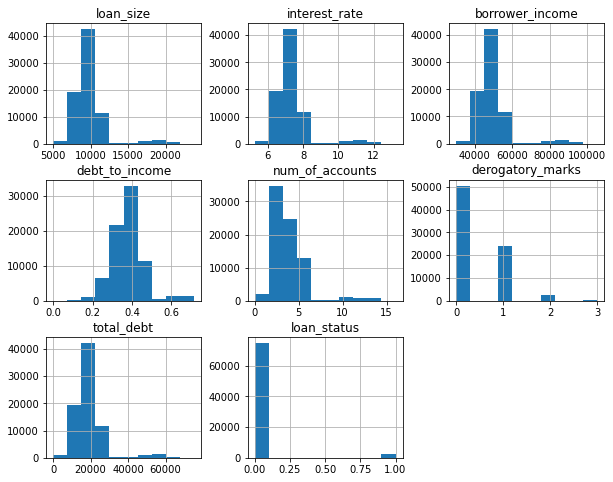

In [51]:
fig, ax = plt.subplots(figsize=(10,8))
lending_data.hist(ax=ax)
plt.show()

## Random Forsert Classifier 

In [38]:
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [39]:
clf = RandomForestClassifier(random_state=1, n_estimators=500).fit(X_train_scaled, y_train)
print(f'Training Score: {clf.score(X_train_scaled, y_train)}')
print(f'Testing Score: {clf.score(X_test_scaled, y_test)}')

Training Score: 0.9975409272252029
Testing Score: 0.9917457697069748


[1.29066792e-01 2.74137485e-01 1.74521675e-01 1.58682971e-01
 1.18902531e-01 8.06639163e-05 1.44607881e-01]


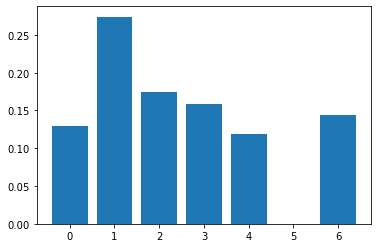

In [40]:
features = clf.feature_importances_
print(features)
plt.bar(x = range(len(features)), height=features)
plt.show()

In [41]:
from sklearn.feature_selection import SelectFromModel
sel = SelectFromModel(clf)
sel.fit(X_train_scaled, y_train)
sel.get_support()

array([False,  True,  True,  True, False, False,  True])

In [42]:
X_selected_train, X_selected_test, y_train, y_test = train_test_split(sel.transform(X), y, random_state=1)
scaler = StandardScaler().fit(X_selected_train)
X_selected_train_scaled = scaler.transform(X_selected_train)
X_selected_test_scaled = scaler.transform(X_selected_test)

/Users/tamanikaid/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


In [43]:
clf = LogisticRegression().fit(X_train_scaled, y_train)
print(f'Training Score: {clf.score(X_train_scaled, y_train)}')
print(f'Testing Score: {clf.score(X_test_scaled, y_test)}')

Training Score: 0.9942908240473243
Testing Score: 0.9936545604622369


In [44]:
clf = LogisticRegression()
clf.fit(X_selected_train_scaled, y_train)
print(f'Training Score: {clf.score(X_selected_train_scaled, y_train)}')
print(f'Testing Score: {clf.score(X_selected_test_scaled, y_test)}')

Training Score: 0.9942908240473243
Testing Score: 0.9936545604622369


# Results

From the results above I believe that the logical Regression Model worked better due to accuracy been closer to 1 however there is really not much difference between the both model.